In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
df = pd.read_csv('data_jobs.csv')
df.head(2)

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
## Skill count per month for data analysts
df_cz = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Czechia')].copy()

df_cz['job_posted_month_no'] = df_cz['job_posted_date'].dt.month

# Explode job_skills column
df_cz_explode = df_cz.explode('job_skills')

In [4]:
df_cz_pivot = df_cz_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_cz_pivot

job_skills,airflow,alteryx,atlassian,aws,azure,bigquery,c,cognos,confluence,databricks,...,ssrs,t-sql,tableau,tidyverse,typescript,vba,visual basic,watson,windows,word
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,5,0,0,0,0,4,...,0,0,5,0,0,3,0,0,0,0
2,1,0,0,2,4,3,0,0,0,0,...,2,0,4,0,0,1,0,0,0,0
3,1,2,0,1,1,1,1,0,0,1,...,0,0,4,1,0,1,0,0,0,1
4,3,1,0,0,1,1,0,0,1,0,...,0,0,7,0,0,1,0,0,0,0
5,5,0,0,0,0,1,0,1,2,4,...,0,1,4,0,0,1,0,0,1,1
6,0,0,0,3,3,1,0,1,0,2,...,0,0,5,0,0,0,0,0,0,0
7,2,0,0,1,3,1,0,0,1,1,...,0,0,8,0,0,0,0,0,0,0
8,0,0,0,3,1,1,0,0,0,1,...,0,1,6,0,0,2,0,1,1,1
9,0,0,1,2,0,2,0,0,1,1,...,0,0,2,0,0,0,1,0,2,0


In [6]:
df_cz_pivot.loc['Total'] = df_cz_pivot.sum()
df_cz_pivot = df_cz_pivot[df_cz_pivot.loc['Total'].sort_values(ascending=False).index]
df_cz_pivot = df_cz_pivot.drop('Total')

df_cz_pivot

job_skills,sql,python,power bi,tableau,r,excel,azure,sap,databricks,snowflake,...,slack,node.js,flow,ggplot2,redis,kafka,powerpoint,plotly,php,ms access
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,18,15,13,5,8,5,5,4,4,2,...,0,1,0,0,1,0,0,0,0,0
2,19,14,7,4,7,3,4,1,0,3,...,0,0,0,0,0,1,0,0,0,0
3,14,9,5,4,6,6,1,2,1,1,...,0,0,0,1,0,0,0,1,0,0
4,10,10,3,7,5,2,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0
5,11,9,4,4,3,4,0,1,4,1,...,0,0,1,0,0,0,0,0,0,0
6,14,8,6,5,4,3,3,0,2,0,...,0,0,0,0,0,0,0,0,0,0
7,13,8,4,8,0,3,3,1,1,2,...,0,0,0,0,0,0,0,0,0,0
8,13,7,6,6,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
9,7,5,3,2,3,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


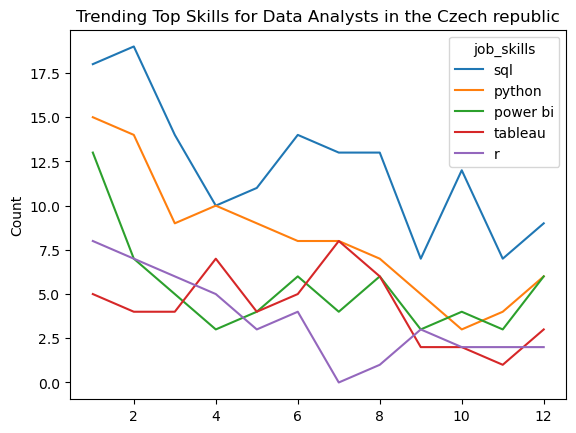

In [7]:
df_cz_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the Czech republic')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [8]:
DA_totals = df_cz.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     23
2     21
3     19
4     22
5     19
6     17
7     20
8     24
9      9
10    14
11     8
12    13
dtype: int64

In [12]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_cz_percent = df_cz_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_cz_percent = df_cz_percent.reset_index()
df_cz_percent['job_posted_month'] = df_cz_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_cz_percent = df_cz_percent.set_index('job_posted_month')
df_cz_percent = df_cz_percent.drop(columns='job_posted_month_no')

df_cz_percent

job_skills,sql,python,power bi,tableau,r,excel,azure,sap,databricks,snowflake,...,slack,node.js,flow,ggplot2,redis,kafka,powerpoint,plotly,php,ms access
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,78.260870,65.217391,56.521739,21.739130,34.782609,21.739130,21.739130,17.391304,17.391304,8.695652,...,0.000000,4.347826,0.000000,0.000000,4.347826,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,90.476190,66.666667,33.333333,19.047619,33.333333,14.285714,19.047619,4.761905,0.000000,14.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.761905,0.000000,0.000000,0.000000,0.000000
Mar,73.684211,47.368421,26.315789,21.052632,31.578947,31.578947,5.263158,10.526316,5.263158,5.263158,...,0.000000,0.000000,0.000000,5.263158,0.000000,0.000000,0.000000,5.263158,0.000000,0.000000
Apr,45.454545,45.454545,13.636364,31.818182,22.727273,9.090909,4.545455,9.090909,0.000000,9.090909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,57.894737,47.368421,21.052632,21.052632,15.789474,21.052632,0.000000,5.263158,21.052632,5.263158,...,0.000000,0.000000,5.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,82.352941,47.058824,35.294118,29.411765,23.529412,17.647059,17.647059,0.000000,11.764706,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,65.000000,40.000000,20.000000,40.000000,0.000000,15.000000,15.000000,5.000000,5.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,54.166667,29.166667,25.000000,25.000000,4.166667,4.166667,4.166667,4.166667,4.166667,8.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,77.777778,55.555556,33.333333,22.222222,33.333333,22.222222,0.000000,0.000000,11.111111,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111


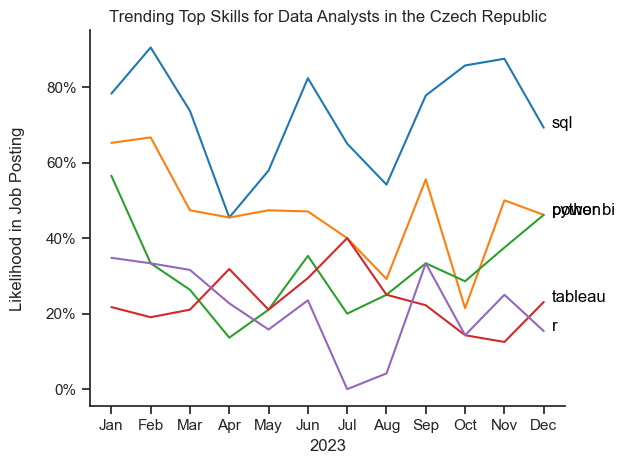

In [17]:
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df_cz_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()  # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the Czech Republic')
plt.ylabel('Likelihood in Job Posting', labelpad=15)  # Increase label padding
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    # Increase the y-coordinate to avoid overlap with data points
    y_position = df_plot.iloc[-1, i] + 0.02  # Adjust y-position slightly above the last data point
    plt.text(11.2, y_position, df_plot.columns[i], color='black', ha='left')

# Adjust the layout to avoid overlapping elements
plt.tight_layout()

plt.show()